In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statistics
from scipy import stats

# Disable warnings!
import warnings
warnings.filterwarnings("ignore")

In [10]:
df=pd.read_csv('/Users/ee/Documents/GITHUB/Project_12 Alaska Airlines/Cheeseplate Demand Data.csv')
df.shape

(5000, 6)

In [11]:
df.isnull().sum().sum() # no any null cell in the data!

0

In [12]:
df.head()

,Dptr Hour,Length of Flight (Hrs),Day of Week,Passengers Boarded,Stock Out Occurred,Cheese Platters Sold
0,8,1,Tuesday,144,0,18
1,5,3,Monday,152,0,15
2,4,2,Thursday,150,0,16
3,6,2,Thursday,131,0,13
4,5,6,Thursday,164,0,18


In [13]:
#Converting day in number to order easily on the graphs
d={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

df['Day of Week']=df['Day of Week'].map(d)
df.shape

(5000, 6)

In [14]:
df.head()

,Dptr Hour,Length of Flight (Hrs),Day of Week,Passengers Boarded,Stock Out Occurred,Cheese Platters Sold
0,8,1,2,144,0,18
1,5,3,1,152,0,15
2,4,2,4,150,0,16
3,6,2,4,131,0,13
4,5,6,4,164,0,18


 # 1. INVESTIGATE THE DATA

## 1A. Relation Between Variables and Number of Cheese Platters Sold

In [15]:
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'15', 'color':'black', 'weight':'bold',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'11', 'weight':'bold'}

def relation_s(a):
    t=df.groupby(by=df.columns[a]).mean()
    t=t[['Cheese Platters Sold']]

    plt.figure(figsize=(15,7))
    
    if df.columns[a]!='Dptr Hour':
        plt.scatter(x=t.index, y=t['Cheese Platters Sold'])
        plt.title('Average Cheese Platters Sold by '+df.columns[a],**title_font)
        plt.xlabel(df.columns[a],**axis_font, labelpad=10)
        plt.ylabel('Cheese Platters Sold',**axis_font)
        plt.show()
    else: # this section works only for "Dptr Hour"
        x=t.index
        y=t['Cheese Platters Sold']
        plt.scatter(x,y)
        plt.title('Average Cheese Platters Sold by '+df.columns[0],**title_font)
        plt.xlabel(df.columns[0],**axis_font, labelpad=10)
        plt.ylabel('Cheese Platters Sold',**axis_font)

        x1=t.index[:8]
        y1=t['Cheese Platters Sold'][:8]
        z = np.polyfit(x1, y1, 1)
        p = np.poly1d(z)
        plt.plot(x1,p(x1),"r--")

        x2=t.index[8:20]
        y2=t['Cheese Platters Sold'][8:20]
        z = np.polyfit(x2, y2, 1)
        p = np.poly1d(z)
        plt.plot(x2,p(x2),"r--")

        x3=t.index[20:]
        y3=t['Cheese Platters Sold'][20:]
        z = np.polyfit(x3, y3, 1)
        p = np.poly1d(z)
        plt.plot(x3,p(x3),"r--")

        plt.show()

In [16]:
# Bar chart graph function
def relation_b(a):
    t=df.groupby(by=df.columns[a]).mean()
    t=t[['Cheese Platters Sold']]
    t.plot(kind='bar', figsize=(15,7)).grid(axis='y')
    plt.title('Average Cheese Platters Sold by '+df.columns[a],**title_font)
    plt.xlabel(df.columns[a],**axis_font, labelpad=10)
    plt.ylabel('Cheese Platters Sold',**axis_font)
    plt.legend('')
    plt.show()

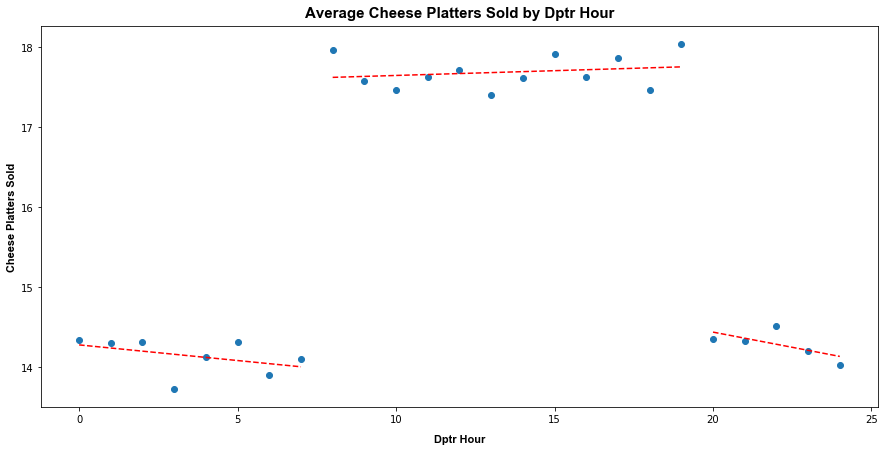

None


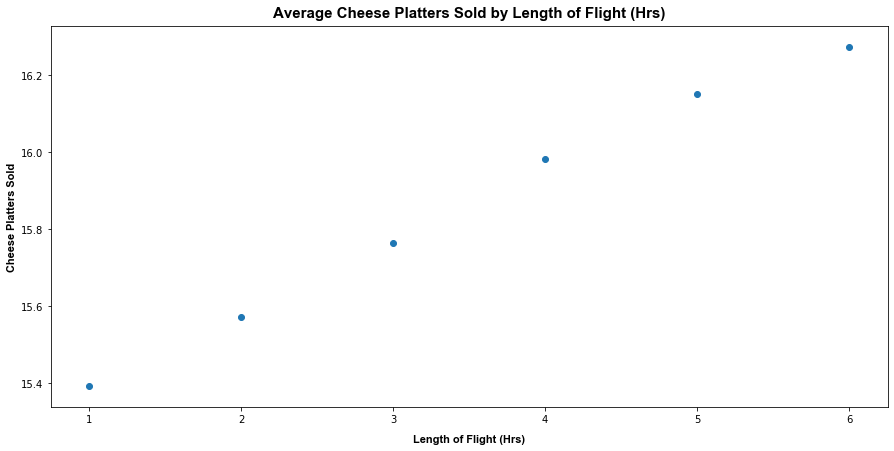

None


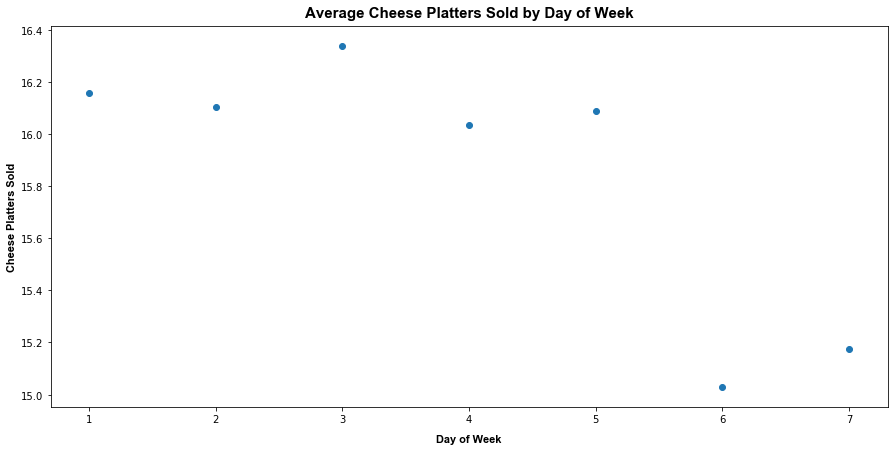

None


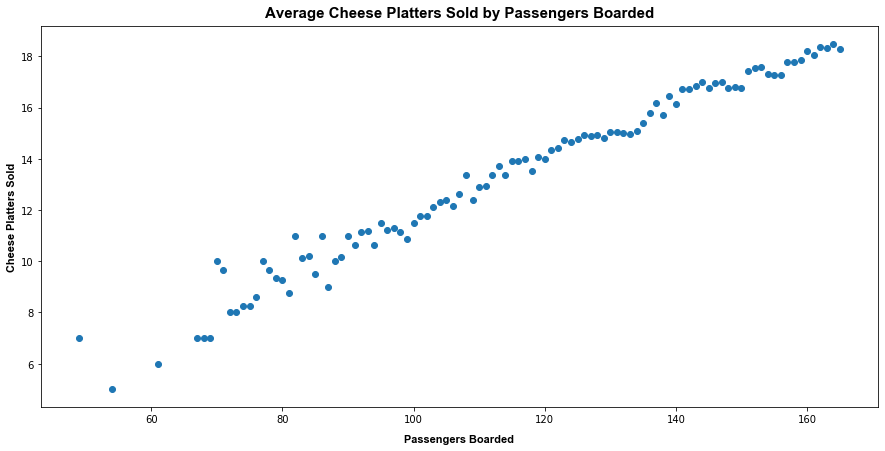

None


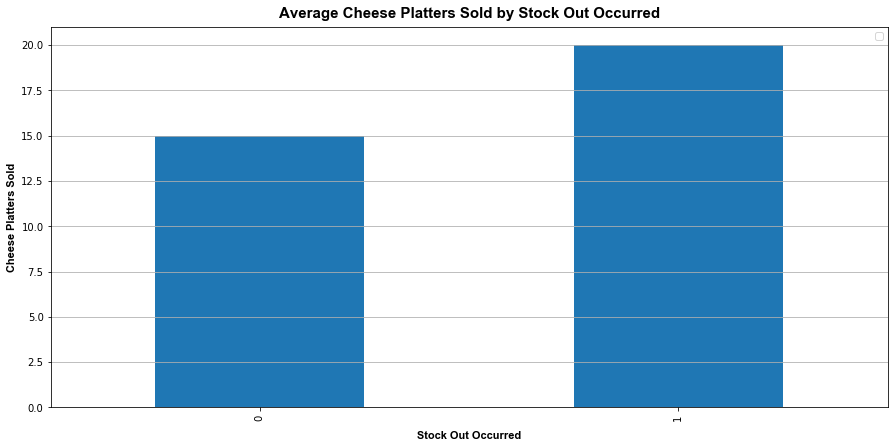

None


In [17]:
for i in range(5):
    if i==4:
        print(relation_b(i))
    else:
        print(relation_s(i))

In [18]:
# Confidence Interval of Non Stock Out Cheese Platters
nso=df[df['Stock Out Occurred']==0][['Cheese Platters Sold']]
nso=nso.describe(percentiles=[.05, .5, .95]) 
nso.rename(columns={'Cheese Platters Sold':'Non Stock Out Cheese Platters Sold'}).round(decimals=0)

,Non Stock Out Cheese Platters Sold
count,4137.0
mean,15.0
std,3.0
min,5.0
5%,11.0
50%,15.0
95%,19.0
max,19.0


### Graph of Cheese Platters Sold by Dept Hour & Week Days

In [19]:
df2=df
# classify the day of week as weekday and weekend
d={1:'Weekday',2:'Weekday',3:'Weekday',4:'Weekday',5:'Weekday',6:'Weekend',7:'Weekend'}

df2['Week Part']=df2['Day of Week'].map(d)
df2.shape

(5000, 7)

In [20]:
df2.head()

,Dptr Hour,Length of Flight (Hrs),Day of Week,Passengers Boarded,Stock Out Occurred,Cheese Platters Sold,Week Part
0,8,1,2,144,0,18,Weekday
1,5,3,1,152,0,15,Weekday
2,4,2,4,150,0,16,Weekday
3,6,2,4,131,0,13,Weekday
4,5,6,4,164,0,18,Weekday


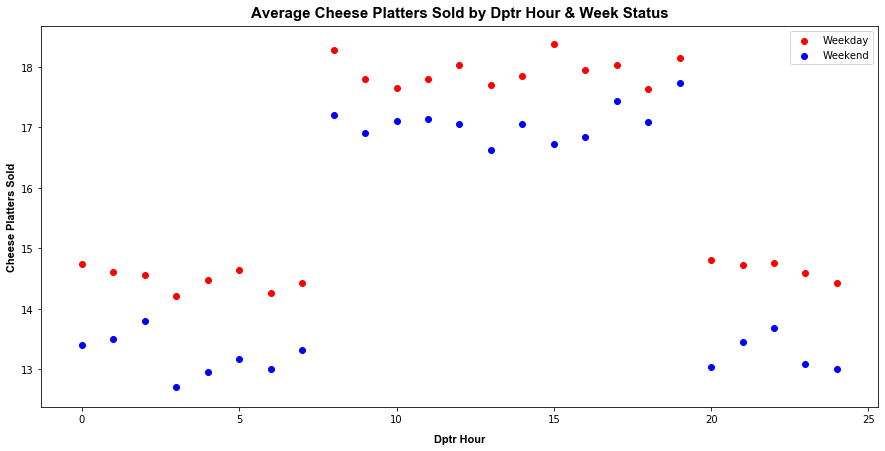

In [21]:
p=df2.groupby(['Week Part','Dptr Hour']).mean()[['Cheese Platters Sold']].unstack().T
p.index=p.index.droplevel(level=0)
x=p.index
y1=p['Weekday']
y2=p['Weekend']

plt.figure(figsize=(15,7))
plt.scatter(x,y1,color='red', label='Weekday')
plt.scatter(x,y2,color='blue', label='Weekend')
plt.title('Average Cheese Platters Sold by Dptr Hour & Week Status',**title_font)
plt.xlabel('Dptr Hour',**axis_font, labelpad=10)
plt.ylabel('Cheese Platters Sold',**axis_font)
plt.legend()
plt.show()

### Statistics of the Cheese Platters Sold

In [199]:
def percentile_right(df,column,alpha):
    upper=np.percentile(df[column], alpha*100)
    return upper

In [22]:
# %95 confidence level values
nso=df2[['Cheese Platters Sold']].describe(percentiles=[.05, .5, .95]) 
nso.round(decimals=1)

,Cheese Platters Sold
count,5000.0
mean,15.8
std,3.0
min,5.0
5%,11.0
50%,16.0
95%,20.0
max,20.0


In [23]:
nso=df2[['Cheese Platters Sold']].describe(percentiles=[.18, .5, .82]) 
nso.round(decimals=1)

,Cheese Platters Sold
count,5000.0
mean,15.8
std,3.0
min,5.0
18%,13.0
50%,16.0
82%,19.0
max,20.0


## 1B. Distribution of Variables

In [24]:
def dist_graph(a,b,c):
    if b=='y':
        t=df.groupby(by=df.columns[a]).count()[:c]
    else:
        t=df.groupby(by=df.columns[a]).count()
    
    t=t[[t.columns[0]]]
    title='Number of Flights by '+df.columns[a]
    if df.columns[a]=='Passengers Boarded':
        graph=t.plot(kind='bar', figsize=(13,6)).grid(axis='y') 
        plt.title(title,**title_font)
        plt.legend('')
    else:
        t.plot(kind='bar', figsize=(13,6)).grid(axis='y') 
        plt.title(title,**title_font)
    plt.ylabel('Number of Flights',**axis_font)
    plt.xlabel(df.columns[a],**axis_font, labelpad=10)
    plt.legend('')
#     plt.show()

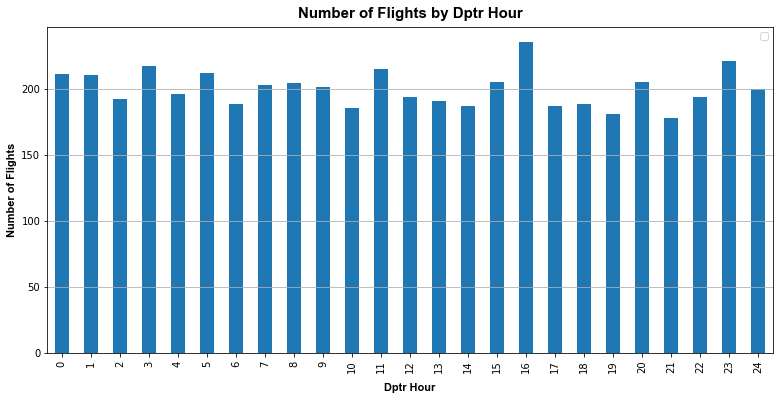

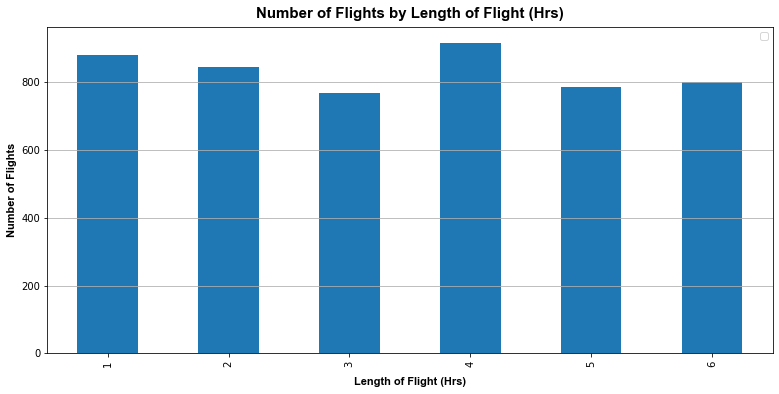

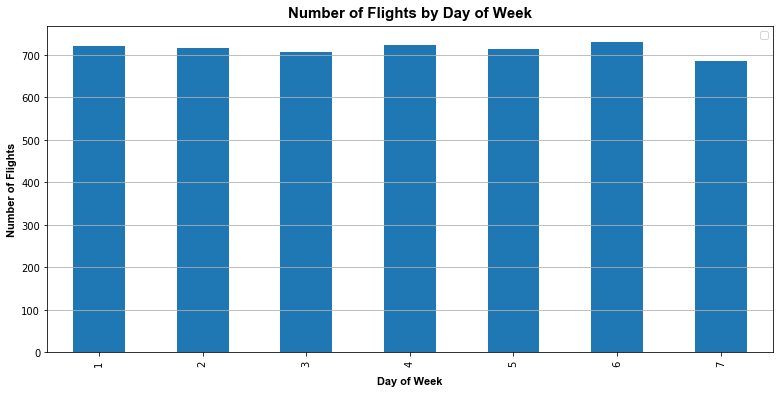

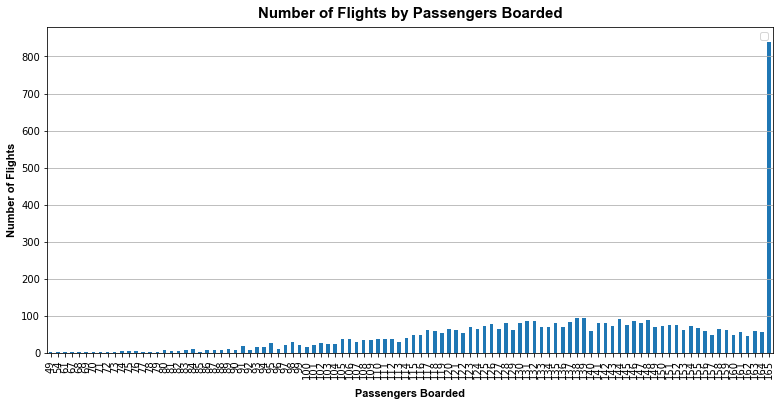

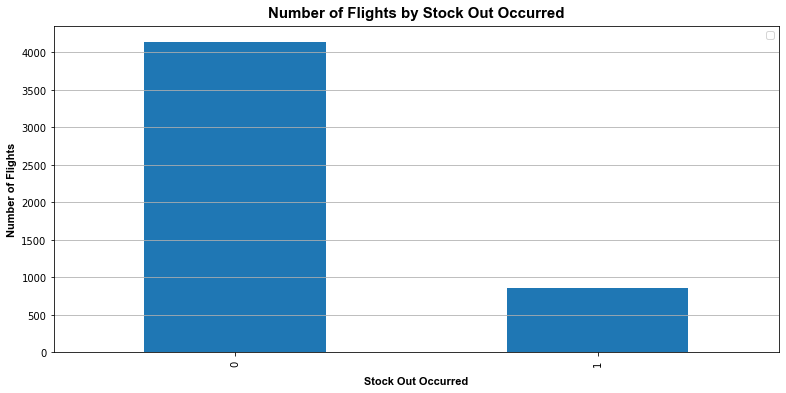

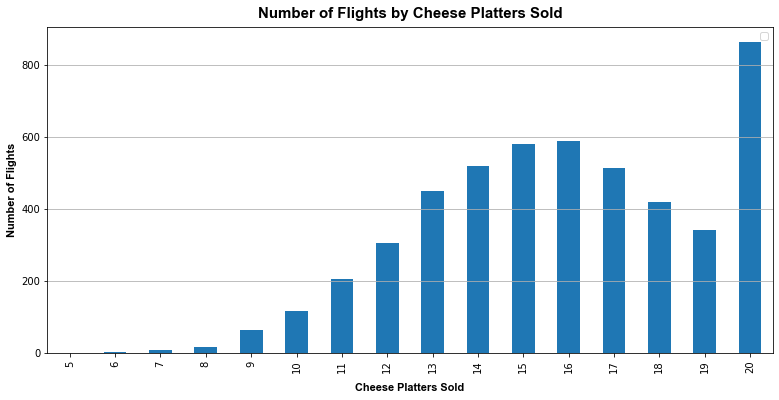

In [25]:
for i in range(6):
    dist_graph(i,'n',-1)

In [26]:
# 95% Confidence Interval of Non Stock Out Passengers Boarded
nso=df2[df2['Stock Out Occurred']==0][['Passengers Boarded']]
nso=nso.describe(percentiles=[.05, .5, .95]) 
nso.round(decimals=0)

,Passengers Boarded
count,4137.0
mean,134.0
std,21.0
min,49.0
5%,97.0
50%,135.0
95%,165.0
max,165.0


In [27]:
# 95% Confidence Interval of Passengers Boarded
nso=df2[['Passengers Boarded']]
nso=nso.describe(percentiles=[.05, .5, .95]) 
nso.round(decimals=0)

,Passengers Boarded
count,5000.0
mean,138.0
std,21.0
min,49.0
5%,99.0
50%,140.0
95%,165.0
max,165.0


In [28]:
nso=df2[['Passengers Boarded']]
nso=nso.describe(percentiles=[.17, .5, .83]) 
nso.round(decimals=0)

,Passengers Boarded
count,5000.0
mean,138.0
std,21.0
min,49.0
17%,117.0
50%,140.0
83%,164.0
max,165.0


# 3.ESTIMATING DEMAND

## Model Poisson Regression 

In [29]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

In [30]:
# the functin which classify departure hour by three class
time_class_dict={ 'early':[0, 7], 'midday':[8, 19],'night':[20,24]}

def time_class_maker(value, time_class_dict=time_class_dict):
        for k, v in time_class_dict.items():
            if (value>=v[0] and value<=v[1]):
                return(k)
            elif value=='NaN':
                return('unknown')# if time is null so it will return to string as 'unknown'

In [31]:
df3=df2
df3.head()

,Dptr Hour,Length of Flight (Hrs),Day of Week,Passengers Boarded,Stock Out Occurred,Cheese Platters Sold,Week Part
0,8,1,2,144,0,18,Weekday
1,5,3,1,152,0,15,Weekday
2,4,2,4,150,0,16,Weekday
3,6,2,4,131,0,13,Weekday
4,5,6,4,164,0,18,Weekday


In [32]:
df3['Hour Class']=df3['Dptr Hour'].map(lambda x: time_class_maker(x))

# convert numeric features to string format
df3['Dptr Hour']=df3['Dptr Hour'].astype(str) # convert to categorical feature
df3['Day of Week']=df3['Day of Week'].astype(str) # convert to categorical feature

In [33]:
df3.head()

,Dptr Hour,Length of Flight (Hrs),Day of Week,Passengers Boarded,Stock Out Occurred,Cheese Platters Sold,Week Part,Hour Class
0,8,1,2,144,0,18,Weekday,midday
1,5,3,1,152,0,15,Weekday,early
2,4,2,4,150,0,16,Weekday,early
3,6,2,4,131,0,13,Weekday,early
4,5,6,4,164,0,18,Weekday,early


In [34]:
df3=df3[['Week Part','Hour Class','Length of Flight (Hrs)',
       'Passengers Boarded', 'Cheese Platters Sold']] 
df3=pd.get_dummies(df3)
df3.head()

,Length of Flight (Hrs),Passengers Boarded,Cheese Platters Sold,Week Part_Weekday,Week Part_Weekend,Hour Class_early,Hour Class_midday,Hour Class_night
0,1,144,18,1,0,0,1,0
1,3,152,15,1,0,1,0,0
2,2,150,16,1,0,1,0,0
3,2,131,13,1,0,1,0,0
4,6,164,18,1,0,1,0,0


In [35]:
features=['Length of Flight (Hrs)','Passengers Boarded','Week Part_Weekday',
          'Hour Class_night','Hour Class_midday']#,'Week Part_Weekend','Hour Class_early'--the base-line dummy variables for categorical features
X=df3[features]
y=df3['Cheese Platters Sold']
X=sm.add_constant(X) # add coefficient to teh model
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)

#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
#Print the training summary.
print(poisson_training_results.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     Cheese Platters Sold   No. Observations:                 3750
Model:                              GLM   Df Residuals:                     3744
Model Family:                   Poisson   Df Model:                            5
Link Function:                      log   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -8698.6
Date:                  Tue, 24 Mar 2020   Deviance:                       182.64
Time:                          17:51:54   Pearson chi2:                     182.
No. Iterations:                       4                                         
Covariance Type:              nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

In [36]:
# dropped the "Hour Class_night" feature from the features table
features=['Length of Flight (Hrs)','Passengers Boarded',
          'Week Part_Weekday','Hour Class_midday']#,'Week Part_Weekend','Hour Class_early','Hour Class_night'
X=df3[features]
y=df3['Cheese Platters Sold']
X=sm.add_constant(X)
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)

#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit() #Poisson
#Print the training summary.
print(poisson_training_results.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     Cheese Platters Sold   No. Observations:                 3750
Model:                              GLM   Df Residuals:                     3745
Model Family:                   Poisson   Df Model:                            4
Link Function:                      log   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -8698.6
Date:                  Tue, 24 Mar 2020   Deviance:                       182.73
Time:                          17:51:56   Pearson chi2:                     182.
No. Iterations:                       4                                         
Covariance Type:              nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const   

In [37]:
print(f'intercept              : {np.exp(1.5827).round(2)}')
print(f'Length of Flight (Hrs) : {np.exp(0.0138).round(2)}')
print(f'Passengers Boarded     : {np.exp(0.0069).round(2)}')
print(f'Week Part_Weekday      : {np.exp(0.0728).round(2)}')
print(f'Hour Class_midday      : {np.exp(0.2310).round(2)}')

intercept              : 4.87
Length of Flight (Hrs) : 1.01
Passengers Boarded     : 1.01
Week Part_Weekday      : 1.08
Hour Class_midday      : 1.26


In [38]:
poisson_train_predictions = poisson_training_results.get_prediction(X_train)
predictions_summary_frame = poisson_train_predictions.summary_frame()
y_train_pred_poisson=predictions_summary_frame['mean']

#Make some predictions on the test data set.
poisson_test_predictions = poisson_training_results.get_prediction(X_test)
predictions_summary_frame2 = poisson_test_predictions.summary_frame()
y_test_pred_poisson=predictions_summary_frame2['mean']
print(predictions_summary_frame2)

           mean   mean_se  mean_ci_lower  mean_ci_upper
1501  10.804432  0.126720      10.558898      11.055676
2586  17.205096  0.148489      16.916510      17.498605
2653  13.013480  0.094606      12.829371      13.200231
1055  16.621995  0.112892      16.402197      16.844738
705   16.902611  0.148667      16.613726      17.196518
...         ...       ...            ...            ...
4141  21.447101  0.166509      21.123220      21.775947
3168  18.687774  0.163911      18.369259      19.011812
2478  19.610642  0.150157      19.318537      19.907164
4214  21.447481  0.171453      21.114058      21.786170
4180  18.815616  0.135297      18.552299      19.082671

[1250 rows x 4 columns]


min predict value: 9.0
max predict value: 22.0


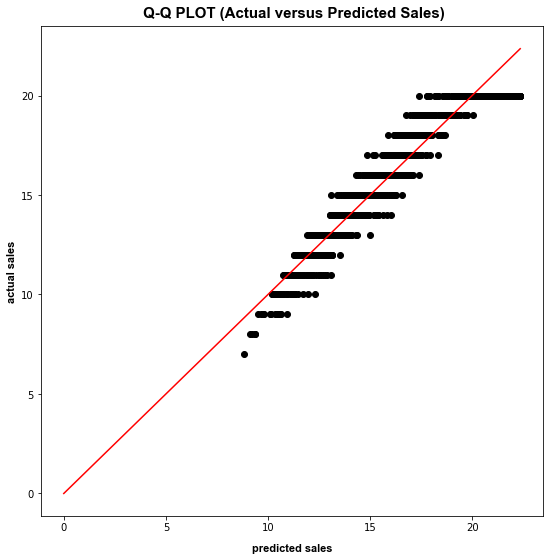

In [39]:
#Predictin vs Actual Sales Graph
plt.figure(figsize=(9,9))
plt.scatter(y_test_pred_poisson,y_test, c='k')
plt.xlabel('predicted sales',**axis_font, labelpad=10)
plt.ylabel('actual sales',**axis_font)
plt.title(' Q-Q PLOT (Actual versus Predicted Sales)',**title_font)
plt.plot( [0, np.max(y_test_pred_poisson)], [0, np.max(y_test_pred_poisson)], c = 'r')
print('min predict value:', np.round(y_test_pred_poisson.min()))
print('max predict value:', np.round( y_test_pred_poisson.max()))

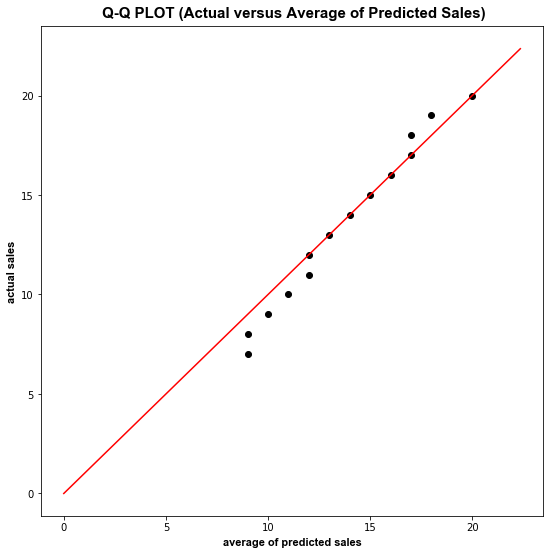

In [40]:
# Take average of the predict values by groupping actual sold values
x=pd.DataFrame(data=[y_test.values,y_test_pred_poisson.values]).T
x=x.rename(columns={0:'actual', 1:'predictions'})
x2=x.groupby(['actual']).mean().round()
plt.figure(figsize=(9,9))
plt.scatter(x2['predictions'],x2.index, c='k')
plt.xlabel('average of predicted sales',**axis_font)
plt.ylabel('actual sales',**axis_font)
plt.title(' Q-Q PLOT (Actual versus Average of Predicted Sales)',**title_font)
plt.plot( [0, np.max(y_test_pred_poisson)], [0, np.max(y_test_pred_poisson)], c = 'r')